In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
%matplotlib inline

In [2]:
G = 1
dt = 0.01
t = np.arange(0, 10, dt)

In [3]:
data = pd.read_csv('pvi.csv')
data

,x,y,vx,vy,m
0,0,0,0,0,1
1,-1,0,0,-1,1
2,1,0,0,1,1


In [44]:
np.imag(np.exp(1j/5))

0.19866933079506122

In [87]:
n = 4

b = np.array([[
    np.real(np.exp(i * 2 * np.pi * 1j / n)),
    np.imag(np.exp(i * 2 * np.pi * 1j / n))
] for i in range(n)])

b = np.concatenate((b, [[0, 0]]), axis=0)
m = np.ones(n+1, dtype='float')
m[n] = 10
n += 1

v = np.array([ [-b[i,1], b[i,0]] for i in range(n)])

 
print(b)
print(v)

# n = 5
# b = np.array([4 * np.random.rand(2) - 2 for i in range(n)])
# v = np.array([4 * np.random.rand(2) - 2 for i in range(n)])
# a = np.zeros((n, 2))
# m = 30 * np.random.rand(n) + 5

# n = data.shape[0]
# b = np.array([list(data['x']), list(data['y'])], dtype='float').T
# v = np.array([list(data['vx']), list(data['vy'])], dtype='float').T
# m = np.array(data['m'], dtype='float')

# n = 3
# b = np.array([[0, 0], [-1, 0], [1, 0]], dtype = 'float')
# v = np.array([[0, 0], [0, -1], [0, 1]], dtype = 'float')
# m = np.array([1, 1, 1], dtype = 'float')

[[ 1.0000000e+00  0.0000000e+00]
 [ 6.1232340e-17  1.0000000e+00]
 [-1.0000000e+00  1.2246468e-16]
 [-1.8369702e-16 -1.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]]
[[-0.0000000e+00  1.0000000e+00]
 [-1.0000000e+00  6.1232340e-17]
 [-1.2246468e-16 -1.0000000e+00]
 [ 1.0000000e+00 -1.8369702e-16]
 [-0.0000000e+00  0.0000000e+00]]


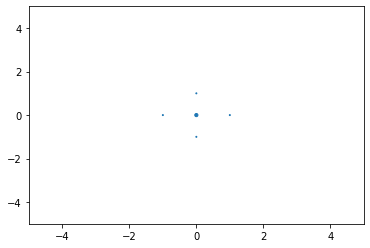

In [88]:
def show_points():
    plt.scatter(b.T[0], b.T[1], s= m)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()


show_points()

In [25]:
def acceleration(pos1, pos2, m1, m2):
    r = pos2 - pos1
    a = (G * m2 / (np.linalg.norm(r)**3)) * r
    return a


def force(pos1, pos2, m1, m2):
    r = pos2 - pos1
    f = (G * m1 * m2 / (np.linalg.norm(r)**3)) * r
    return f


def update(pos, vel, acc):
    vel += acc * dt
    pos += vel * dt
    return pos, vel

In [7]:
# def animate(k):
#     a = np.zeros((n, 2))
#     for i in range(n):
#         for j in range(n):
#             if i != j:
#                 a[i] += acceleration(b[i], b[j], m[i], m[j])
#     for i in range(n):
#         b[i], v[i] = update(b[i], v[i], a[i])

In [8]:
for k in range(len(t)):
    #     animate(k)
    #     show_points()
    break

In [27]:
def gravitation(S, t, n, m):
    x = S[:n]
    y = S[n:2 * n]
    vx = S[2 * n:3 * n]
    vy = S[3 * n:4 * n]

    pos = np.array([x, y]).T
    acc = np.zeros((n, 2))

    for i in range(n):
        for j in range(i + 1, n):
            fij = force(pos[i], pos[j], m[i], m[j])
            acc[i] += fij / m[i]
            acc[j] -= fij / m[j]

    return np.concatenate((vx, vy, acc[:, 0], acc[:, 1]))

In [34]:
S0 = np.concatenate((b[:, 0], b[:, 1], v[:, 0], v[:, 1]))
S0

array([-0.92907694, -0.1287657 ,  0.63789589,  0.51410197, -0.42307505,
       -0.28898024, -0.74193914,  0.99790328, -0.23333235, -0.67916519,
        0.90304506, -0.03777331])

In [29]:
gravitation(S0, t, n, m)

array([-7.41939136e-01,  9.97903280e-01, -2.33332353e-01, -6.79165194e-01,
        9.03045058e-01, -3.77733087e-02,  2.21884772e+00,  2.85297530e+00,
       -6.52351017e+00, -1.98051327e+00,  3.81257530e+00, -4.87169159e-03])

In [12]:
def state_to_pos(S):
    x = S[:n]
    y = S[n:2 * n]

    pos = np.array([x, y]).T
    return pos

In [30]:
state_to_pos(S0)

array([[-0.92907694,  0.51410197],
       [-0.1287657 , -0.42307505],
       [ 0.63789589, -0.28898024]])

In [31]:
sol = odeint(gravitation, S0, t, args=(n, m))

In [32]:
x1 = sol[:, 0]
x2 = sol[:, 1]
x3 = sol[:, 2]
y1 = sol[:, 3]
y2 = sol[:, 4]
y3 = sol[:, 5]

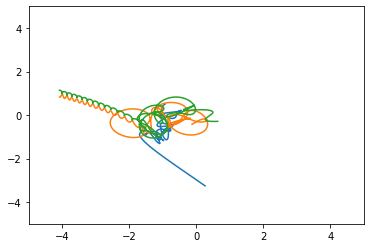

In [33]:
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

In [89]:
def state_to_DataFrame(S, n, m):
#     print(S.shape)
#     print(n) 
#     print(m.shape)
#     return
    
    x = S[:n]
    y = S[n:2 * n]
    vx = S[2 * n:3 * n]
    vy = S[3 * n:4 * n]
    dic = {'x': x, 'y': y, 'vx': vx, 'vy': vy, 'm': m}
    df = pd.DataFrame(dic)
    return df

S0 = np.concatenate((b[:, 0], b[:, 1], v[:, 0], v[:, 1]))
df = state_to_DataFrame(S0, n, m)
df.to_csv('pvi_'+str(n-1)+'.csv', index=False)
df

,x,y,vx,vy,m
0,1.000000e+00,0.000000e+00,-0.000000e+00,1.000000e+00,1.0
1,6.123234e-17,1.000000e+00,-1.000000e+00,6.123234e-17,1.0
2,-1.000000e+00,1.224647e-16,-1.224647e-16,-1.000000e+00,1.0
3,-1.836970e-16,-1.000000e+00,1.000000e+00,-1.836970e-16,1.0
4,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,10.0
